In [160]:
import os
import pandas as pd
import numpy as np
import pickle
import ast
from tqdm import tqdm
# Plotting libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import cv2
%matplotlib inline

In [2]:
les = pd.read_csv(r'DATA/2006Fall_2017Spring_GOES_meteo_combined.csv')
les.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp (F),RH (%),...,Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F)
0,2006-10-01,00:00,2006-09-30,00:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...","[array([ nan, nan, nan, nan, nan...",48,86,...,4100,4800,7000,10,984.0,1007.00,1006.80,0.00,45,NC
1,2006-10-01,01:00,2006-09-30,01:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...","[array([ nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,983.7,1006.50,1006.40,0.00,44,NC
2,2006-10-01,02:00,2006-09-30,02:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,5500,11000,m,10,982.7,1005.70,1005.40,0.00,45,NC
3,2006-10-01,03:00,2006-09-30,03:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,982.0,1005.10,1004.70,0.00,44,NC
4,2006-10-01,04:00,2006-09-30,04:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...","[array([ nan, nan, nan, nan, nan...",48,89,...,2200,3500,m,8,982.0,1004.90,1004.70,0.02,46,NC


In [3]:
column_names = les.columns.tolist()
print(column_names)

['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST', 'File_name_for_1D_lake', 'File_name_for_2D_lake', 'Lake_data_1D', 'Lake_data_2D', 'Temp (F)', 'RH (%)', 'Dewpt (F)', 'Wind Spd (mph)', 'Wind Direction (deg)', 'Peak Wind Gust(mph)', 'Low Cloud Ht (ft)', 'Med Cloud Ht (ft)', 'High Cloud Ht (ft)', 'Visibility (mi)', 'Atm Press (hPa)', 'Sea Lev Press (hPa)', 'Altimeter (hPa)', 'Precip (in)', 'Wind Chill (F)', 'Heat Index (F)']


In [4]:
# Renaming
les.rename(columns={ "Temp (F)": "Temp_F", "RH (%)": "RH_pct",
                   "Dewpt (F)" : "Dewpt_F", "Wind Spd (mph)" : "Wind_Spd_mph",
                   "Wind Direction (deg)" : "Wind_Direction_deg", "Peak Wind Gust(mph)" : "Peak_Wind_Gust_mph",
                   "Low Cloud Ht (ft)" : "Low_Cloud_Ht_ft", "Med Cloud Ht (ft)" : "Med_Cloud_Ht_ft",
                   "High Cloud Ht (ft)" : "High_Cloud_Ht_ft", "Visibility (mi)" : "Visibility_mi",
                   "Atm Press (hPa)" : "Atm_Press_hPa", "Sea Lev Press (hPa)" : "Sea_Lev_Press_hPa",
                   "Altimeter (hPa)" : "Altimeter_hPa", "Precip (in)" : "Precip_in",
                   "Wind Chill (F)" : "Wind_Chill_F", "Heat Index (F)" : "Heat_Index_F",
                   } , inplace = True)

les.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,...,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,Wind_Chill_F,Heat_Index_F
0,2006-10-01,00:00,2006-09-30,00:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...","[array([ nan, nan, nan, nan, nan...",48,86,...,4100,4800,7000,10,984.0,1007.00,1006.80,0.00,45,NC
1,2006-10-01,01:00,2006-09-30,01:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...","[array([ nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,983.7,1006.50,1006.40,0.00,44,NC
2,2006-10-01,02:00,2006-09-30,02:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,5500,11000,m,10,982.7,1005.70,1005.40,0.00,45,NC
3,2006-10-01,03:00,2006-09-30,03:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,982.0,1005.10,1004.70,0.00,44,NC
4,2006-10-01,04:00,2006-09-30,04:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...","[array([ nan, nan, nan, nan, nan...",48,89,...,2200,3500,m,8,982.0,1004.90,1004.70,0.02,46,NC


In [5]:
# Replace with 0
les = les.replace(['m', 'M'], '0')

In [6]:
les = les.drop(['Wind_Chill_F', 'Heat_Index_F'], axis=1)
les = les.reset_index(drop=True)

In [7]:
def missing_values(df):
    total_null = df.isna().sum()
    percent_null = total_null / df.count() # Total count of null values / Total count of values
    missing_data = pd.concat([total_null, percent_null], axis = 1, keys = ['Total Null', 'Percentage Null'])
    return missing_data

missing_values(les)

,Total Null,Percentage Null
Date_UTC,0,0.000000
Time_UTC,0,0.000000
Date_CST,0,0.000000
Time_CST,0,0.000000
File_name_for_1D_lake,2941,0.065095
File_name_for_2D_lake,2941,0.065095
Lake_data_1D,0,0.000000
Lake_data_2D,0,0.000000
Temp_F,239,0.004991
RH_pct,239,0.004991


In [8]:
les = les.dropna()
print('Total observation count after missing value treatment: ', len(les))

Total observation count after missing value treatment:  44942


In [9]:
les.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44942 entries, 0 to 48120
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date_UTC               44942 non-null  object
 1   Time_UTC               44942 non-null  object
 2   Date_CST               44942 non-null  object
 3   Time_CST               44942 non-null  object
 4   File_name_for_1D_lake  44942 non-null  object
 5   File_name_for_2D_lake  44942 non-null  object
 6   Lake_data_1D           44942 non-null  object
 7   Lake_data_2D           44942 non-null  object
 8   Temp_F                 44942 non-null  object
 9   RH_pct                 44942 non-null  object
 10  Dewpt_F                44942 non-null  object
 11  Wind_Spd_mph           44942 non-null  object
 12  Wind_Direction_deg     44942 non-null  object
 13  Peak_Wind_Gust_mph     44942 non-null  object
 14  Low_Cloud_Ht_ft        44942 non-null  object
 15  Med_Cloud_Ht_ft        4

In [10]:
# Using apply method
columns = les.columns
les[columns[8:]] = les[columns[8:]].apply(pd.to_numeric, errors='coerce')

In [11]:
import pandas as pd

# Assuming filtered_les is your DataFrame and 'Precip_in' is the name of the column you want to check
# Replace 'Precip_in' with the actual name of your column
min_value = les['Precip_in'].min()
max_value = les['Precip_in'].max()

print(f"The value range of the column 'Precip_in' is from {min_value} to {max_value}.")


The value range of the column 'Precip_in' is from 0.0 to 1.4.


In [12]:
for i,row in les.iterrows():
    if row['Precip_in'] > 0.0 and row['Precip_in'] < 0.05:
        les.at[i, 'rain'] = 'low'
    elif row['Precip_in'] >= 0.05 and row['Precip_in'] < 0.3:
        les.at[i, 'rain'] = 'medium'
    elif row['Precip_in'] >= 0.3:
        les.at[i, 'rain'] = 'high'
    else:
        les.at[i, 'rain'] = 'none'

In [13]:
les.sample(25)

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,...,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,rain
38821,2012-03-08,12:00,2012-03-08,12:00,goes15.2012.03.08.1200.v01.nc-var0.csv,T_goes15.2012.03.08.1200.v01.nc-var0.csv.csv,"[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, ...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",32.0,81.0,...,0,1800,2600,3300,9,992.0,1015.3,1014.9,0.00,none
10094,2016-11-26,14:00,2016-11-26,14:00,goes15.2016.11.26.1400.v01.nc-var1-t0.csv,T_goes15.2016.11.26.1400.v01.nc-var1-t0.csv.csv,"[0.1775, 0.1775, 0.17, 0.16499999, 0.185, 0.17...","[array([ nan, nan, nan, nan, nan...",41.0,67.0,...,0,3000,0,0,10,998.7,1022.1,1021.7,0.00,none
21199,2014-03-04,06:00,2014-03-04,06:00,goes15.2014.03.04.0600.v01.nc-var1-t0.csv,T_goes15.2014.03.04.0600.v01.nc-var1-t0.csv.csv,"[0.0, 0.0025, 0.0025, 0.0025, nan, 0.0025, 0.0...","[array([ nan, nan, nan, nan, nan...",14.0,76.0,...,0,10000,0,0,8,1000.3,1024.8,1023.4,0.00,none
41098,2012-12-11,09:00,2012-12-11,09:00,goes15.2012.12.11.0900.v01.nc-var1-t0.csv,T_goes15.2012.12.11.0900.v01.nc-var1-t0.csv.csv,"[0.0, 0.0025, 0.0, 0.0, nan, 0.005, 0.0025, na...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",23.0,77.0,...,0,3800,7000,15000,10,990.3,1014.2,1013.2,0.00,none
15424,2008-01-05,16:00,2008-01-05,16:00,goes11.2008.01.05.1600.v01.nc-var1-t0.csv,T_goes11.2008.01.05.1600.v01.nc-var1-t0.csv.csv,"[0.3225, 0.29999998, 0.29749998, 0.31, 0.31, 0...","[array([ nan, nan, nan, nan, nan, nan, n...",38.0,89.0,...,0,700,0,0,4,986.0,1009.2,1008.8,0.00,none
13326,2007-10-10,06:00,2007-10-10,06:00,goes11.2007.10.10.0600.v01.nc-var1-t0.csv,T_goes11.2007.10.10.0600.v01.nc-var1-t0.csv.csv,"[0.0, 0.0025, 0.0, nan, nan, 0.0, 0.0, nan, na...","[array([ nan, nan, nan, nan, nan...",46.0,89.0,...,0,2500,6000,0,3,983.7,1006.5,1006.4,0.00,none
7207,2009-01-27,07:00,2009-01-27,07:00,goes11.2009.01.27.0700.v01.nc-var1-t0.csv,T_goes11.2009.01.27.0700.v01.nc-var1-t0.csv.csv,"[0.0, nan, nan, 0.0075, nan, 0.005, nan, nan, ...","[array([ nan, nan, nan, nan, nan...",-8.0,82.0,...,0,20000,0,0,10,1006.6,1031.5,1029.8,0.00,none
33372,2011-01-23,11:00,2011-01-23,11:00,goes13.2011.01.23.1100.v01.nc-var0.csv,T_goes13.2011.01.23.1100.v01.nc-var0.csv.csv,"[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",3.0,56.0,...,0,2200,4500,0,10,1003.0,1027.8,1026.1,0.00,none
25830,2016-03-14,05:00,2016-03-13,05:00,goes15.2016.03.14.0500.v01.nc-var1-t0.csv,T_goes15.2016.03.14.0500.v01.nc-var1-t0.csv.csv,"[0.005, 0.005, 0.0, nan, nan, nan, 0.0025, nan...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",36.0,89.0,...,0,20000,0,0,4,993.7,1016.8,1016.6,0.00,none
1620,2006-12-07,12:00,2006-12-07,12:00,goes11.2006.12.07.1200.v01.nc-var1-t0.csv,T_goes11.2006.12.07.1200.v01.nc-var1-t0.csv.csv,"[0.0075, nan, nan, nan, nan, 0.0075, nan, 0.00...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",21.0,67.0,...,31,2600,3600,0,5,1002.6,1027.0,1025.7,0.00,none


In [14]:
filtered_les = les.loc[(les['Time_UTC'] >= '14:00')
                     & (les['Time_UTC'] <= '21:00')]
filtered_les

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,...,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,rain
14,2006-10-01,14:00,2006-10-01,14:00,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",60.0,49.0,...,0,3600,0,0,10,994.7,1017.8,1017.6,0.0,none
15,2006-10-01,15:00,2006-10-01,15:00,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",60.0,47.0,...,0,0,0,0,10,994.7,1017.7,1017.6,0.0,none
16,2006-10-01,16:00,2006-10-01,16:00,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",59.0,55.0,...,0,0,0,0,10,994.7,1017.8,1017.6,0.0,none
17,2006-10-01,17:00,2006-10-01,17:00,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",55.0,71.0,...,0,0,0,0,10,994.7,1017.8,1017.6,0.0,none
18,2006-10-01,18:00,2006-10-01,18:00,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",50.0,82.0,...,0,8000,0,0,10,994.7,1017.9,1017.6,0.0,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48114,2015-03-31,17:00,2015-03-31,17:00,goes15.2015.03.31.1700.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1700.v01.nc-var1-t0.csv.csv,"[0.225, 0.22749999, 0.48, 0.3075, 0.1925, 0.24...","[array([ nan, nan, nan, nan, nan...",39.0,54.0,...,0,7000,10000,0,10,989.0,1012.6,1011.9,0.0,none
48115,2015-03-31,18:00,2015-03-31,18:00,goes15.2015.03.31.1800.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1800.v01.nc-var1-t0.csv.csv,"[0.2075, 0.1925, 0.18249999, 0.1625, 0.1725, 0...","[array([ nan, nan, nan, nan, nan...",37.0,61.0,...,0,5500,7000,0,10,989.3,1012.8,1012.2,0.0,none
48116,2015-03-31,19:00,2015-03-31,19:00,goes15.2015.03.31.1900.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1900.v01.nc-var1-t0.csv.csv,"[0.22, 0.1925, 0.1775, 0.16749999, 0.16499999,...","[array([ nan, nan, nan, ...",37.0,66.0,...,18,3500,5500,0,10,990.7,1014.1,1013.5,0.0,none
48117,2015-03-31,20:00,2015-03-31,20:00,goes15.2015.03.31.2000.v01.nc-var1-t0.csv,T_goes15.2015.03.31.2000.v01.nc-var1-t0.csv.csv,"[0.2575, 0.22, 0.21249999, 0.17999999, 0.185, ...","[array([ nan, nan, nan, nan, nan...",36.0,85.0,...,0,2100,2900,5000,10,991.0,1014.6,1013.9,0.0,none


In [15]:
filtered_les = filtered_les.reset_index(drop=True)
filtered_les.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,...,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,rain
0,2006-10-01,14:00,2006-10-01,14:00,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",60.0,49.0,...,0,3600,0,0,10,994.7,1017.8,1017.6,0.0,none
1,2006-10-01,15:00,2006-10-01,15:00,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",60.0,47.0,...,0,0,0,0,10,994.7,1017.7,1017.6,0.0,none
2,2006-10-01,16:00,2006-10-01,16:00,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",59.0,55.0,...,0,0,0,0,10,994.7,1017.8,1017.6,0.0,none
3,2006-10-01,17:00,2006-10-01,17:00,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",55.0,71.0,...,0,0,0,0,10,994.7,1017.8,1017.6,0.0,none
4,2006-10-01,18:00,2006-10-01,18:00,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",50.0,82.0,...,0,8000,0,0,10,994.7,1017.9,1017.6,0.0,none


In [16]:
# Summary
filtered_les.describe()

,Temp_F,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
count,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000
mean,34.777540,68.733329,25.085078,7.167414,159.115778,4.482041,4563.364992,3438.374691,1019.519765,8.158518,990.881814,959.613658,1014.846064,0.002405
std,14.316023,14.901769,13.510689,5.083779,127.925488,9.498400,5745.372636,6299.684479,3960.147230,3.046510,42.279235,233.710831,27.735722,0.016895
min,-15.000000,0.000000,-20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,59.000000,16.000000,3.000000,0.000000,0.000000,1500.000000,0.000000,0.000000,7.000000,987.000000,1009.500000,1009.800000,0.000000
50%,34.000000,70.000000,25.000000,7.000000,190.000000,0.000000,2700.000000,0.000000,0.000000,10.000000,993.000000,1016.400000,1016.300000,0.000000
75%,44.000000,80.000000,34.000000,10.000000,270.000000,0.000000,4500.000000,3900.000000,0.000000,10.000000,999.000000,1022.500000,1022.000000,0.000000
max,88.000000,100.000000,66.000000,34.000000,360.000000,52.000000,28000.000000,25000.000000,26000.000000,10.000000,1018.900000,1043.600000,1042.300000,0.860000


In [17]:
print('Total observations: ', filtered_les.shape[0])
print('Total number of features: ', filtered_les.shape[1])

Total observations:  14951
Total number of features:  23


In [18]:
filtered_les

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,...,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,rain
0,2006-10-01,14:00,2006-10-01,14:00,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",60.0,49.0,...,0,3600,0,0,10,994.7,1017.8,1017.6,0.0,none
1,2006-10-01,15:00,2006-10-01,15:00,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",60.0,47.0,...,0,0,0,0,10,994.7,1017.7,1017.6,0.0,none
2,2006-10-01,16:00,2006-10-01,16:00,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",59.0,55.0,...,0,0,0,0,10,994.7,1017.8,1017.6,0.0,none
3,2006-10-01,17:00,2006-10-01,17:00,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",55.0,71.0,...,0,0,0,0,10,994.7,1017.8,1017.6,0.0,none
4,2006-10-01,18:00,2006-10-01,18:00,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",50.0,82.0,...,0,8000,0,0,10,994.7,1017.9,1017.6,0.0,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14946,2015-03-31,17:00,2015-03-31,17:00,goes15.2015.03.31.1700.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1700.v01.nc-var1-t0.csv.csv,"[0.225, 0.22749999, 0.48, 0.3075, 0.1925, 0.24...","[array([ nan, nan, nan, nan, nan...",39.0,54.0,...,0,7000,10000,0,10,989.0,1012.6,1011.9,0.0,none
14947,2015-03-31,18:00,2015-03-31,18:00,goes15.2015.03.31.1800.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1800.v01.nc-var1-t0.csv.csv,"[0.2075, 0.1925, 0.18249999, 0.1625, 0.1725, 0...","[array([ nan, nan, nan, nan, nan...",37.0,61.0,...,0,5500,7000,0,10,989.3,1012.8,1012.2,0.0,none
14948,2015-03-31,19:00,2015-03-31,19:00,goes15.2015.03.31.1900.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1900.v01.nc-var1-t0.csv.csv,"[0.22, 0.1925, 0.1775, 0.16749999, 0.16499999,...","[array([ nan, nan, nan, ...",37.0,66.0,...,18,3500,5500,0,10,990.7,1014.1,1013.5,0.0,none
14949,2015-03-31,20:00,2015-03-31,20:00,goes15.2015.03.31.2000.v01.nc-var1-t0.csv,T_goes15.2015.03.31.2000.v01.nc-var1-t0.csv.csv,"[0.2575, 0.22, 0.21249999, 0.17999999, 0.185, ...","[array([ nan, nan, nan, nan, nan...",36.0,85.0,...,0,2100,2900,5000,10,991.0,1014.6,1013.9,0.0,none


In [19]:
rows_with_moderate_rainfall = filtered_les[filtered_les['rain'] == 'moderate']
rows_with_medium_rainfall = filtered_les[filtered_les['rain'] == 'medium']
rows_with_high_rainfall = filtered_les[filtered_les['rain'] == 'high']
rows_with_none_rainfall = filtered_les[filtered_les['rain'] == 'none']


In [20]:
print(rows_with_moderate_rainfall.shape[0] + rows_with_medium_rainfall.shape[0] + rows_with_high_rainfall.shape[0] + rows_with_none_rainfall.shape[0])

14097


In [21]:
data_sample = les['Lake_data_1D'][16]
data_sample

'[0.0725, 0.067499995, 0.07, 0.07, 0.067499995, 0.067499995, 0.065, 0.067499995, 0.07, 0.0625, 0.0625, 0.06, 0.0625, 0.055, 0.067499995, 0.055, 0.065, 0.07, 0.065, 0.0725, 0.0775, 0.0625, 0.067499995, 0.0625, 0.065, 0.067499995, 0.0625, 0.0625, 0.06, 0.0625, 0.0625, 0.065, 0.06, 0.06, 0.0625, 0.0625, 0.067499995, 0.067499995, 0.067499995, 0.067499995, 0.0775, 0.074999996, 0.067499995, 0.065, 0.049999997, 0.049999997, 0.067499995, 0.067499995, 0.055, 0.055, 0.0725, 0.067499995, 0.065, 0.0625, 0.065, 0.0625, 0.065, 0.057499997, 0.065, 0.0725, 0.0625, 0.0625, 0.065, 0.07, 0.067499995, 0.0625, 0.057499997, 0.055, 0.0625, 0.074999996, 0.055, 0.06, 0.0625, 0.067499995, 0.057499997, 0.0625, 0.067499995, 0.065, 0.057499997, 0.065, 0.0625, 0.0625, 0.067499995, 0.06, 0.0625, 0.067499995, 0.065, 0.085, 0.067499995, 0.082499996, 0.057499997, 0.0625, 0.055, 0.06, 0.067499995, 0.057499997, 0.065, 0.0625, 0.0625, 0.06, 0.067499995, 0.055, 0.065, 0.0625, 0.0625, 0.06, 0.067499995, 0.057499997, 0.06749

In [25]:
def arrays_2_png(lat, lon, val, fig_name, rainfall):
    status_code = -1
    # Here it starts
    if len(lat) == len(lon) == len(val):
        plt.figure(figsize=(10, 10))
        plt.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')
        plt.colorbar(orientation='vertical')
        plt.savefig(r'images/lake-michigan-images/' + rainfall + '/' + fig_name + '.png')
        status_code = 0
    else:
        status_code = 255

    return status_code

In [26]:
df_lat_lon = df_lat_lon = pd.read_csv(
    r'DATA/lat_long_1D_labels_for_plotting.csv')
df_lat_lon.head(5)

,latitude,longitude
0,41.78,-87.54
1,41.78,-87.50
2,41.78,-87.46
3,41.78,-87.42
4,41.78,-87.38


In [27]:
df_lat_lon.shape

(3599, 2)

In [28]:
lat_lst = df_lat_lon['latitude'].to_list()
lon_lst = df_lat_lon['longitude'].to_list()

In [29]:
data_sample = filtered_les['Lake_data_1D'][16]
data_sample

'[0.1575, 0.1375, 0.13, 0.1325, 0.1325, 0.1275, 0.13, 0.1275, 0.13499999, 0.1275, 0.1525, 0.22, 0.19749999, 0.155, 0.1375, 0.1525, 0.1425, 0.1475, 0.16, 0.13499999, 0.1325, 0.125, 0.114999995, 0.1275, 0.125, 0.145, 0.1425, 0.1325, 0.16499999, 0.1925, 0.19749999, 0.17, 0.14999999, 0.13499999, 0.16499999, 0.16, 0.16499999, 0.16499999, 0.1725, 0.21, 0.13499999, 0.1375, 0.1325, 0.122499995, 0.1275, 0.114999995, 0.122499995, 0.1275, 0.13499999, 0.1525, 0.16749999, 0.12, 0.14, 0.13, 0.1325, 0.13, 0.16, 0.155, 0.1625, 0.175, 0.16, 0.205, 0.17, 0.1475, 0.16499999, 0.1525, 0.13, 0.12, 0.1375, 0.1325, 0.1475, 0.175, 0.2025, 0.1275, 0.1175, 0.1275, 0.1325, 0.13499999, 0.13, 0.1375, 0.1475, 0.16749999, 0.1725, 0.18249999, 0.195, 0.1475, 0.1325, 0.122499995, 0.175, 0.1525, 0.16499999, 0.1425, 0.13499999, 0.1325, 0.13499999, 0.1475, 0.145, 0.13, 0.1275, 0.1175, 0.114999995, 0.1275, 0.13, 0.1325, 0.1275, 0.1275, 0.1325, 0.1625, 0.19999999, 0.1525, 0.16749999, 0.1375, 0.14, 0.11, 0.14999999, 0.1475, 0

In [30]:
import ast

data_sample_lst = ast.literal_eval(data_sample)
data_sample_lst[0:10]

[0.1575,
 0.1375,
 0.13,
 0.1325,
 0.1325,
 0.1275,
 0.13,
 0.1275,
 0.13499999,
 0.1275]

In [31]:
ldata_sample = data_sample.strip('][').split(', ')
ldata_sample[0:10]

['0.1575',
 '0.1375',
 '0.13',
 '0.1325',
 '0.1325',
 '0.1275',
 '0.13',
 '0.1275',
 '0.13499999',
 '0.1275']

In [32]:
data_sample_lst2 = [float(el) for el in ldata_sample]
data_sample_lst2[0:10]

[0.1575,
 0.1375,
 0.13,
 0.1325,
 0.1325,
 0.1275,
 0.13,
 0.1275,
 0.13499999,
 0.1275]

In [33]:
data_sample_lst2 = [float(el) for el in filtered_les['Lake_data_1D'][16].strip('][').split(', ')]
data_sample_lst2[0:10]

[0.1575,
 0.1375,
 0.13,
 0.1325,
 0.1325,
 0.1275,
 0.13,
 0.1275,
 0.13499999,
 0.1275]

In [34]:
data_sample_lst == data_sample_lst2

True

0

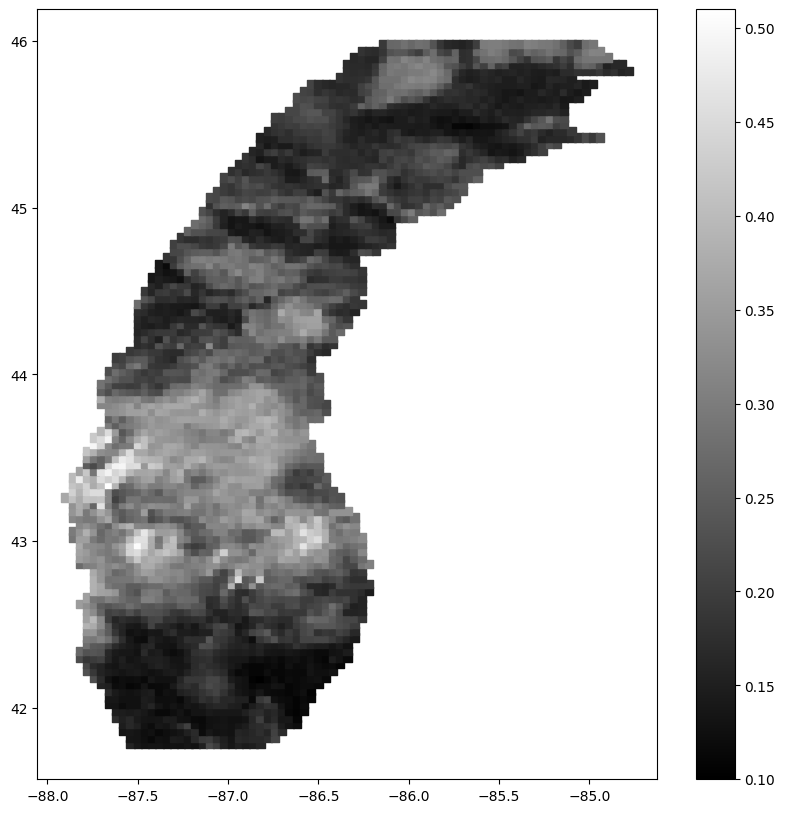

In [35]:
arrays_2_png(lat_lst, lon_lst, data_sample_lst, 'sample', 'none') 

In [36]:
filtered_les.loc[5177]

Date_UTC                                                        2008-01-18
Time_UTC                                                             15:00
Date_CST                                                        2008-01-18
Time_CST                                                             15:00
File_name_for_1D_lake            goes11.2008.01.18.1500.v01.nc-var1-t0.csv
File_name_for_2D_lake      T_goes11.2008.01.18.1500.v01.nc-var1-t0.csv.csv
Lake_data_1D             [0.0525, 0.055, 0.06, 0.0425, 0.06, 0.055, 0.0...
Lake_data_2D             [array([ nan,  nan,  nan,  nan,  nan,  nan,  n...
Temp_F                                                                20.0
RH_pct                                                                77.0
Dewpt_F                                                               14.0
Wind_Spd_mph                                                            11
Wind_Direction_deg                                                     250
Peak_Wind_Gust_mph       

In [37]:
filtered_les.loc[5177]['rain']

'none'

0

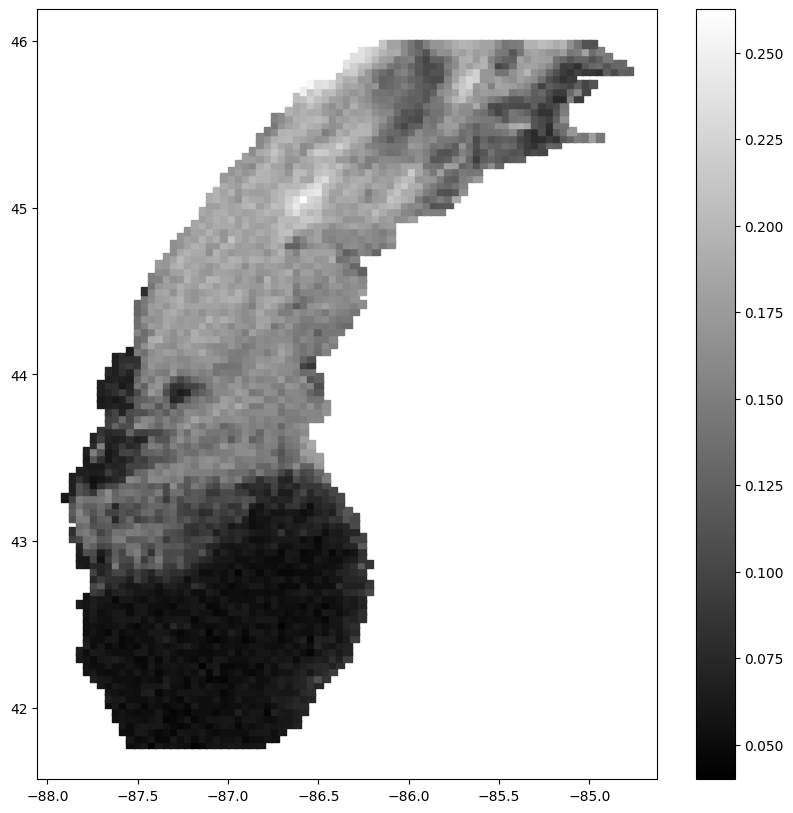

In [38]:
arrays_2_png(lat_lst, lon_lst, ast.literal_eval(filtered_les['Lake_data_1D'][5177]), 'sample', filtered_les.loc[5177]['rain'])

In [39]:
les['Lake_data_1D'][5177].strip('][').split(', ')

['0.1025',
 '0.095',
 '0.095',
 '0.089999996',
 '0.082499996',
 '0.095',
 '0.0875',
 '0.082499996',
 '0.082499996',
 '0.095',
 '0.082499996',
 '0.085',
 '0.082499996',
 '0.089999996',
 '0.082499996',
 '0.089999996',
 '0.095',
 '0.095',
 '0.1025',
 '0.1025',
 '0.085',
 '0.0875',
 '0.089999996',
 '0.0775',
 '0.0925',
 '0.085',
 '0.082499996',
 '0.089999996',
 '0.082499996',
 '0.0775',
 '0.0875',
 '0.089999996',
 '0.0775',
 '0.0775',
 '0.085',
 '0.0725',
 '0.089999996',
 '0.0875',
 '0.1025',
 '0.0875',
 '0.0975',
 '0.0925',
 '0.0875',
 '0.089999996',
 '0.089999996',
 '0.089999996',
 '0.082499996',
 '0.082499996',
 '0.0925',
 '0.0875',
 '0.085',
 '0.0925',
 '0.082499996',
 '0.0875',
 '0.085',
 '0.0875',
 '0.0875',
 '0.082499996',
 '0.089999996',
 '0.089999996',
 '0.085',
 '0.089999996',
 '0.095',
 '0.105',
 '0.0925',
 '0.082499996',
 '0.089999996',
 '0.089999996',
 '0.089999996',
 '0.08',
 '0.085',
 '0.0775',
 '0.08',
 '0.0875',
 '0.08',
 '0.082499996',
 '0.074999996',
 '0.067499995',
 '0.

In [40]:
def rectify(crap_string):
    return [0.0 if el == 'nan' else float(el) for el in crap_string.strip('][').split(', ')]

0

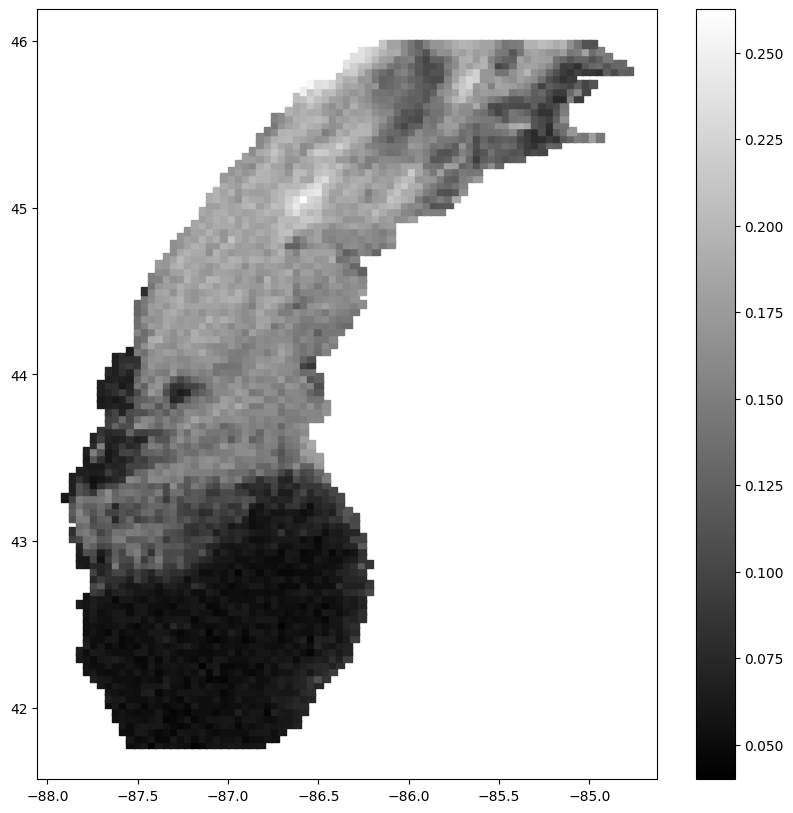

In [41]:
arrays_2_png(lat_lst, lon_lst, 
             [0.0 if el == 'nan' else float(el) for el in filtered_les['Lake_data_1D'][5177].strip('][').split(', ')], 
             'sample',  filtered_les.loc[5177]['rain'])

0

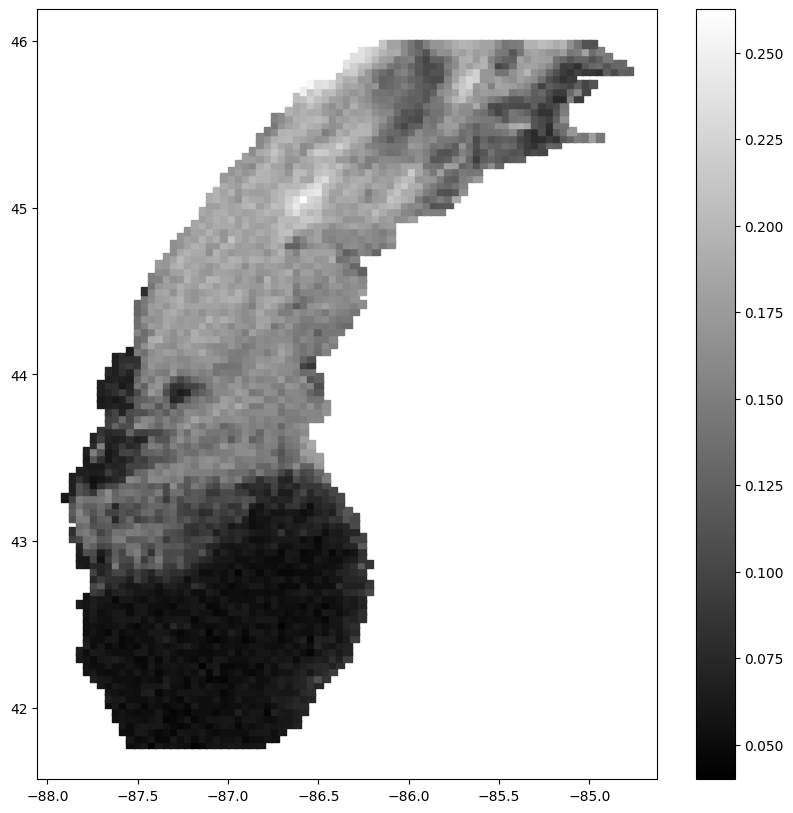

In [42]:
arrays_2_png(lat_lst, lon_lst, 
             rectify(filtered_les['Lake_data_1D'][5177]), 
             'sample', filtered_les.loc[5177]['rain'])

In [43]:
# Remove the colormap and axis to clean images
def arrays_2_png_data(lat, lon, val, fig_name, rainfall):
    status_code = -1

    if len(lat) == len(lon) == len(val):
        plt.figure(figsize=(10, 10))
        plt.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')
        plt.axis('off')
        plt.savefig(r'images/lake-michigan-images/' + rainfall + '/' + fig_name +'.png')
        plt.close()
        status_code = 0
    else:
        status_code = 255

    return status_code

In [44]:
for i, row in filtered_les.iterrows():
    if i == 10:
        arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
        print(arr)
        arrays_2_png_data(lat_lst, lon_lst, arr, str(i), filtered_les.iloc[i]['rain'])
        break

[0.24499999, 0.2025, 0.1925, 0.185, 0.19749999, 0.1925, 0.1875, 0.19, 0.185, 0.1875, 0.2725, 0.17999999, 0.21249999, 0.175, 0.175, 0.17, 0.17, 0.1925, 0.1925, 0.22999999, 0.2075, 0.185, 0.1925, 0.1925, 0.19, 0.19749999, 0.17999999, 0.17999999, 0.18249999, 0.195, 0.1875, 0.17999999, 0.14999999, 0.16, 0.14999999, 0.1375, 0.16749999, 0.33249998, 0.265, 0.3125, 0.235, 0.2025, 0.195, 0.19749999, 0.22999999, 0.205, 0.1925, 0.17999999, 0.17, 0.17999999, 0.1925, 0.205, 0.185, 0.1475, 0.21499999, 0.24, 0.2625, 0.29, 0.2625, 0.295, 0.24249999, 0.28, 0.305, 0.2375, 0.19749999, 0.19749999, 0.195, 0.2025, 0.1875, 0.185, 0.1875, 0.185, 0.22, 0.21, 0.18249999, 0.28, 0.2175, 0.32, 0.295, 0.285, 0.2525, 0.30249998, 0.35999998, 0.255, 0.26749998, 0.315, 0.29999998, 0.4475, 0.3575, 0.21, 0.2325, 0.22749999, 0.1925, 0.19749999, 0.18249999, 0.18249999, 0.1875, 0.16749999, 0.17999999, 0.21249999, 0.19749999, 0.2625, 0.29, 0.3125, 0.2575, 0.2525, 0.285, 0.355, 0.2375, 0.33249998, 0.195, 0.26749998, 0.2575, 0

In [45]:
from tqdm import tqdm
for i, row in tqdm(les.iterrows()):
    if i == 100:
        break

92it [00:00, 2585.23it/s]


In [46]:
filtered_les.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,...,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,rain
0,2006-10-01,14:00,2006-10-01,14:00,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",60.0,49.0,...,0,3600,0,0,10,994.7,1017.8,1017.6,0.0,none
1,2006-10-01,15:00,2006-10-01,15:00,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",60.0,47.0,...,0,0,0,0,10,994.7,1017.7,1017.6,0.0,none
2,2006-10-01,16:00,2006-10-01,16:00,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",59.0,55.0,...,0,0,0,0,10,994.7,1017.8,1017.6,0.0,none
3,2006-10-01,17:00,2006-10-01,17:00,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",55.0,71.0,...,0,0,0,0,10,994.7,1017.8,1017.6,0.0,none
4,2006-10-01,18:00,2006-10-01,18:00,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",50.0,82.0,...,0,8000,0,0,10,994.7,1017.9,1017.6,0.0,none


In [47]:
from tqdm import tqdm

def row_generator(df):
    for i, row in df.iterrows():
        yield i, row

batch_size = 1000  # Adjust as needed
num_batches = len(filtered_les) // batch_size + 1
gen = row_generator(filtered_les)
batches = []
for batch_num in range(num_batches):
    batch_df = []
    for _ in range(batch_size):
        try:
            i, row = next(gen)
            batch_df.append((i, row))
        except StopIteration:
            break
    batches.append(batch_df)
    
    # for i, row in tqdm(batch_df):
    #     try:
    #         arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
    #         arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
    #     except Exception as e:
    #         print(e)
    #         print("Oopsie at row:", i)


In [48]:
len(batches)

15

In [49]:
for i, row in tqdm(batches[0]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:13<00:00,  7.48it/s]


In [50]:
for i, row in tqdm(batches[1]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:13<00:00,  7.48it/s]


In [51]:
for i, row in tqdm(batches[2]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:11<00:00,  7.62it/s]


In [52]:
for i, row in tqdm(batches[3]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:12<00:00,  7.57it/s]


In [53]:
for i, row in tqdm(batches[4]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:11<00:00,  7.58it/s]


In [54]:
for i, row in tqdm(batches[5]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:21<00:00,  7.04it/s]


In [55]:
for i, row in tqdm(batches[6]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:15<00:00,  7.40it/s]


In [56]:
for i, row in tqdm(batches[7]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:37<00:00,  6.35it/s]


In [57]:
for i, row in tqdm(batches[8]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:40<00:00,  4.53it/s]


In [58]:
for i, row in tqdm(batches[9]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:38<00:00,  4.57it/s]


In [59]:
for i, row in tqdm(batches[10]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:30<00:00,  4.74it/s]


In [60]:
for i, row in tqdm(batches[11]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:26<00:00,  4.84it/s]


In [61]:
for i, row in tqdm(batches[12]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:46<00:00,  4.42it/s]


In [62]:
for i, row in tqdm(batches[13]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:46<00:00,  4.41it/s]


In [63]:
for i, row in tqdm(batches[14]):
        try:
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, str(i), row['rain'])
        except Exception as e:
            print(e)
            print("Oopsie at row:", i)

100%|████████████████████████████████████████████████████████████████████████████████| 951/951 [03:39<00:00,  4.34it/s]


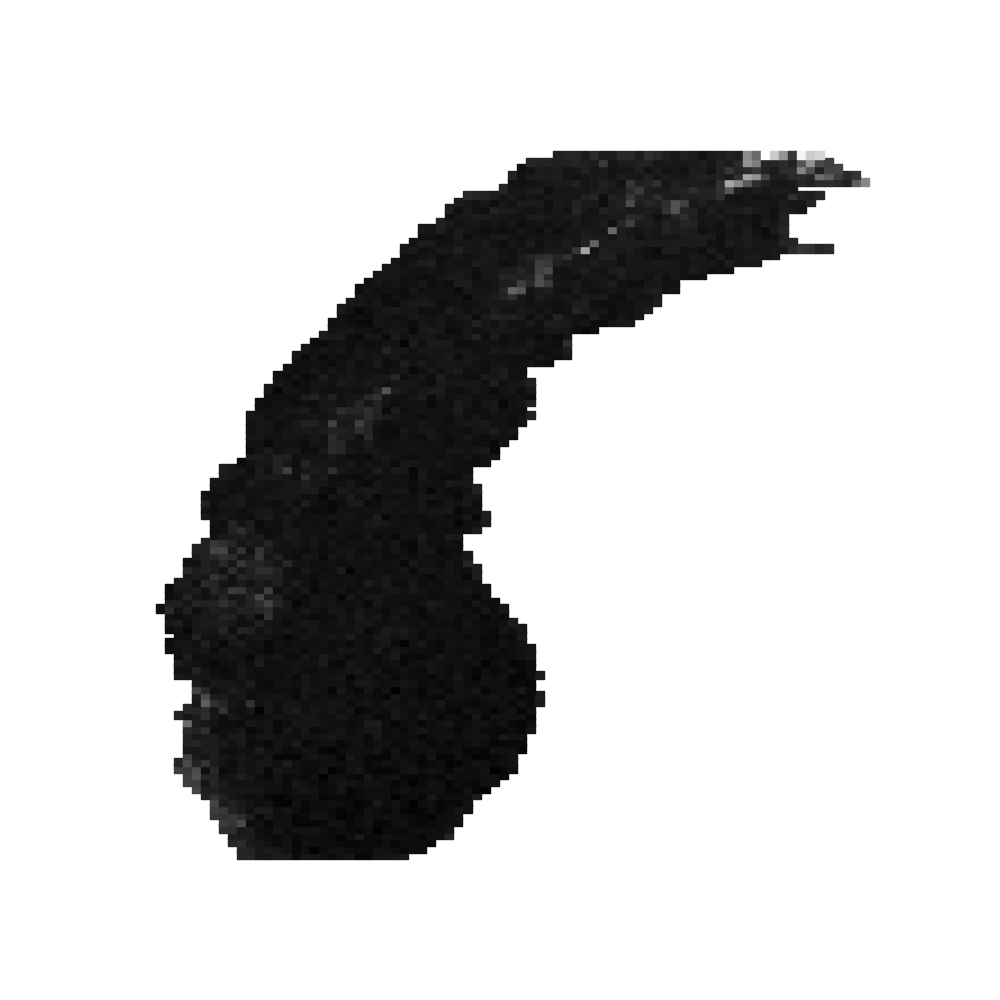

In [64]:
from PIL import Image, ImageOps

img = Image.open('./images/lake-michigan-images/none/39.png')
img

In [65]:
#full = np.full(img.size, 255)
img = ImageOps.grayscale(img)
#mask = (full - img).astype(np.uint8)
#mask = (0 < mask).astype(int)
img = np.asarray(img)
mask = (255 != img).astype(int)
np.nonzero(mask)

(array([150, 150, 150, ..., 860, 860, 860], dtype=int64),
 array([553, 554, 555, ..., 406, 407, 408], dtype=int64))

In [66]:
(mask * 255)[150, 553], (mask * 255)[860, 408]

(255, 255)

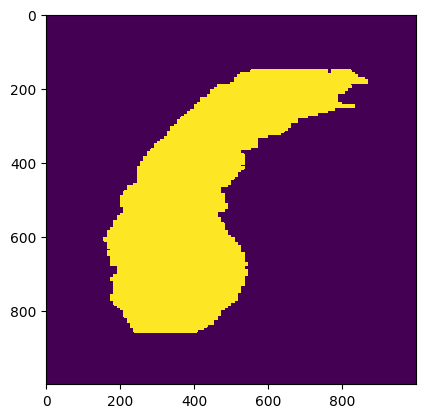

In [67]:
plt.imshow(mask * 255, interpolation='none')
plt.show()

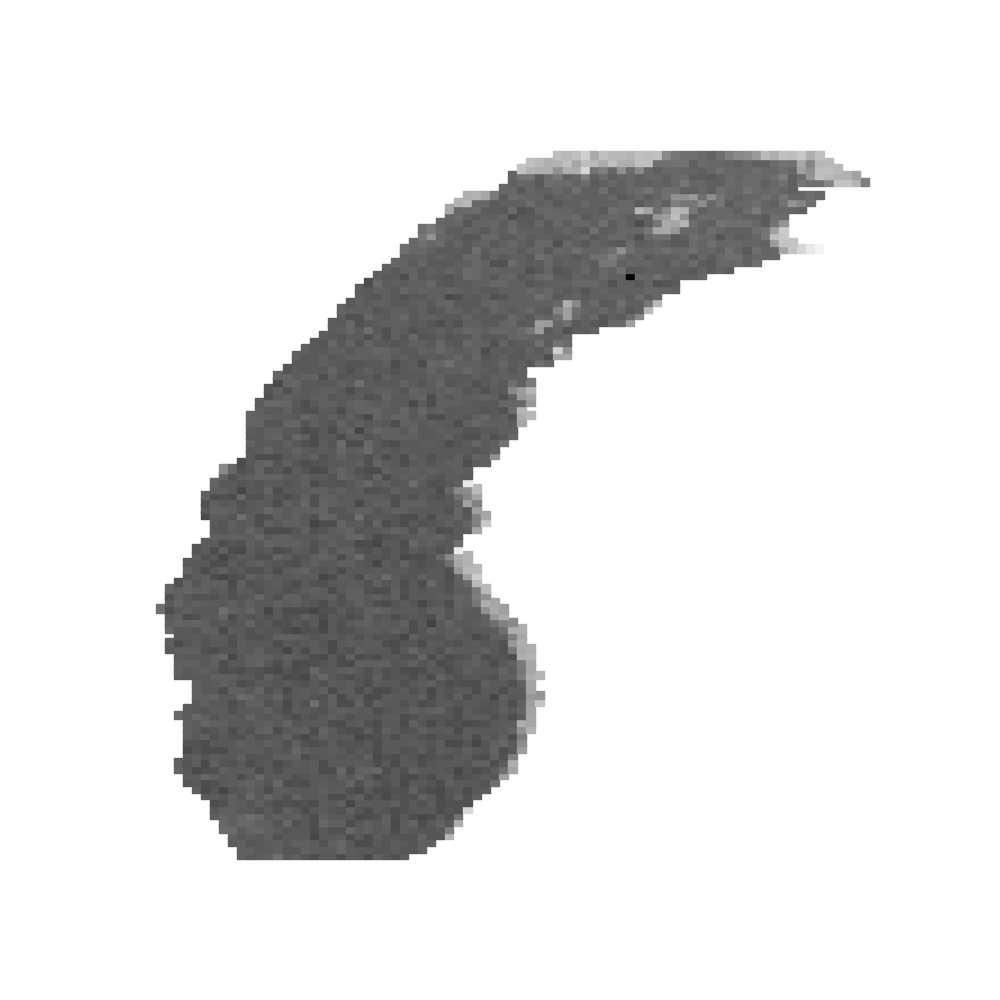

In [68]:
img = Image.open('./Images/lake-michigan-images/none/6.png')
img = ImageOps.grayscale(img)
img

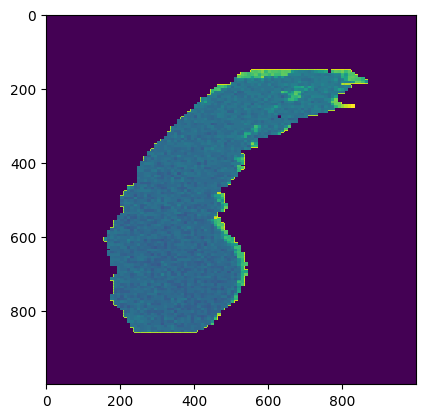

In [69]:
newimg = np.asarray(img) * mask # mask with the lake michigan mask to zero out outside region
plt.imshow(newimg, interpolation='none')   
plt.show()

In [70]:
(newimg)[150, 553], (newimg)[860, 408]

(245, 231)

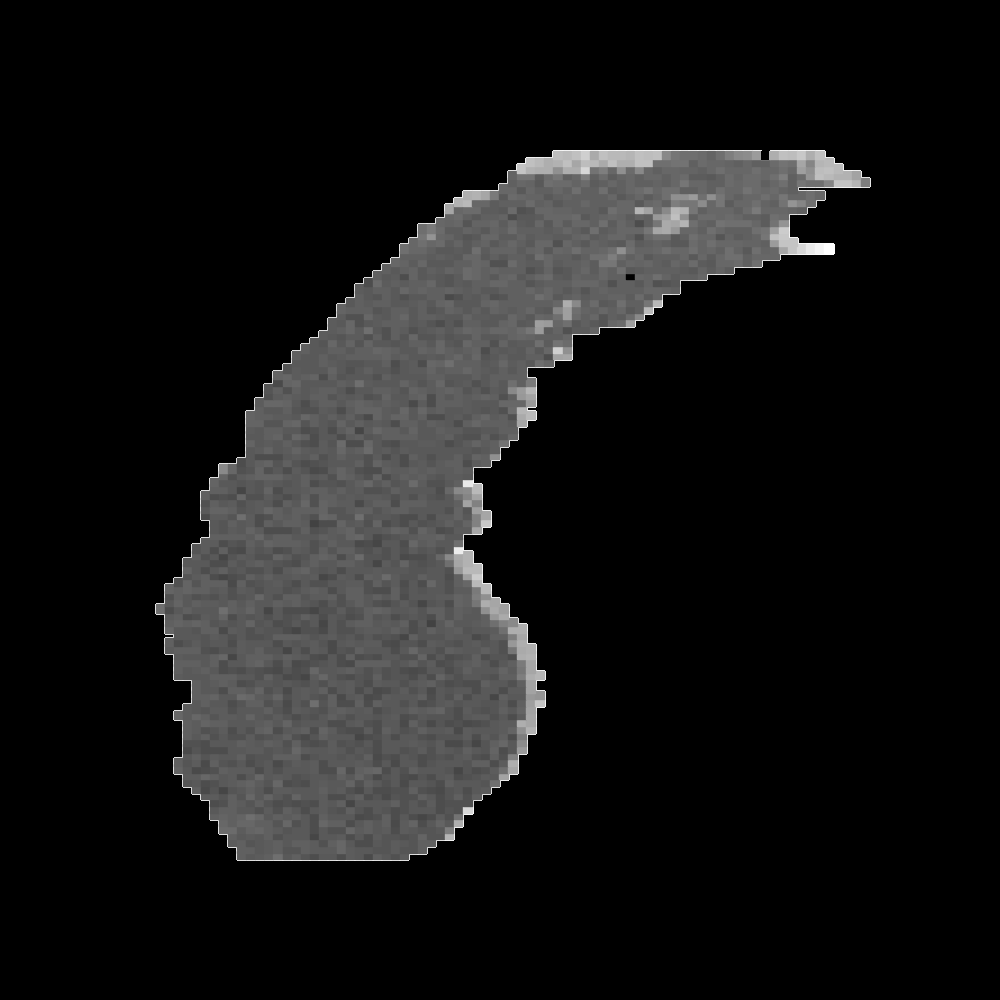

In [71]:
ImageOps.grayscale(Image.fromarray(newimg))

In [72]:
ImageOps.grayscale(Image.fromarray(newimg)).save('./Images/lake-michigan-images/none/sample.png')

In [73]:
from PIL import Image, ImageOps
f = './Images/lake-michigan-images/none'
g = './Images/lake-michigan-images-64/none'
for file in tqdm(os.listdir(f)):
    f_img = f + "/" + file
    g_img = g + "/" + file
    img = Image.open(f_img)
    img = ImageOps.grayscale(img)
    newimg = np.asarray(img) * mask # mask with the lake michigan mask to zero out land region
    newimg64 = ImageOps.grayscale(Image.fromarray(newimg)).resize((64,64), Image.LANCZOS)
    newimg64.save(g_img)

100%|████████████████████████████████████████████████████████████████████████████| 13894/13894 [09:22<00:00, 24.71it/s]


In [74]:
from PIL import Image, ImageOps
f = 'images/lake-michigan-images/low'
g = 'images/lake-michigan-images-64/low'
for file in tqdm(os.listdir(f)):
    f_img = f + "/" + file
    g_img = g + "/" + file
    img = Image.open(f_img)
    img = ImageOps.grayscale(img)
    newimg = np.asarray(img) * mask # mask with the lake michigan mask to zero out land region
    newimg64 = ImageOps.grayscale(Image.fromarray(newimg)).resize((64,64), Image.LANCZOS)
    newimg64.save(g_img)

100%|████████████████████████████████████████████████████████████████████████████████| 854/854 [00:35<00:00, 24.26it/s]


In [75]:
from PIL import Image, ImageOps
f = './Images/lake-michigan-images/medium'
g = './Images/lake-michigan-images-64/medium'
for file in tqdm(os.listdir(f)):
    f_img = f + "/" + file
    g_img = g + "/" + file
    img = Image.open(f_img)
    img = ImageOps.grayscale(img)
    newimg = np.asarray(img) * mask # mask with the lake michigan mask to zero out land region
    newimg64 = ImageOps.grayscale(Image.fromarray(newimg)).resize((64,64), Image.LANCZOS)
    newimg64.save(g_img)

100%|████████████████████████████████████████████████████████████████████████████████| 201/201 [00:08<00:00, 24.90it/s]


In [76]:
from PIL import Image, ImageOps
f = './Images/lake-michigan-images/high'
g = './Images/lake-michigan-images-64/high'
for file in tqdm(os.listdir(f)):
    f_img = f + "/" + file
    g_img = g + "/" + file
    img = Image.open(f_img)
    img = ImageOps.grayscale(img)
    newimg = np.asarray(img) * mask # mask with the lake michigan mask to zero out land region
    newimg64 = ImageOps.grayscale(Image.fromarray(newimg)).resize((64,64), Image.LANCZOS)
    newimg64.save(g_img)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 24.09it/s]


In [77]:
import cv2

# Load the image
image = cv2.imread('./Images/lake-michigan-images-64/high/13625.png')

# Calculate the sum of pixel values
sum_pixel_values = image.sum()

# Get the total number of pixels
total_pixels = image.size

# Calculate the intensity*
intensity = sum_pixel_values / total_pixels

print(f"The intensity of the image is: {intensity}")


The intensity of the image is: 30.17919921875


In [78]:

# Create an empty DataFrame
img_intensity_rain = pd.DataFrame(columns=['img_intensity', 'rain'])



In [79]:
import os
import cv2
import pandas as pd



# Specify the path to the folder
folder_path = './Images/lake-michigan-images-64/none/'

# List all files in the folder
files = os.listdir(folder_path)

# Iterate through each file
for file_name in files:
    # Check if the item is a file (not a directory)
    if os.path.isfile(os.path.join(folder_path, file_name)):
        # Load the image
        image = cv2.imread(os.path.join(folder_path, file_name))

        # Calculate the sum of pixel values
        sum_pixel_values = image.sum()
        
        # Get the total number of pixels
        total_pixels = image.size
        
        # Calculate the intensity
        intensity = sum_pixel_values / total_pixels
        
        # Create a new DataFrame with values to append
        new_data = pd.DataFrame({'img_intensity': [intensity], 'rain': ['none']})
        
        # Append the new data to the original DataFrame
        img_intensity_rain = pd.concat([img_intensity_rain, new_data], ignore_index=True)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4372\3536443612.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  img_intensity_rain = pd.concat([img_intensity_rain, new_data], ignore_index=True)


In [80]:
import os
import cv2
import pandas as pd



# Specify the path to the folder
folder_path = './Images/lake-michigan-images-64/low/'

# List all files in the folder
files = os.listdir(folder_path)

# Iterate through each file
for file_name in files:
    # Check if the item is a file (not a directory)
    if os.path.isfile(os.path.join(folder_path, file_name)):
        # Load the image
        image = cv2.imread(os.path.join(folder_path, file_name))

        # Calculate the sum of pixel values
        sum_pixel_values = image.sum()
        
        # Get the total number of pixels
        total_pixels = image.size
        
        # Calculate the intensity
        intensity = sum_pixel_values / total_pixels
        
        # Create a new DataFrame with values to append
        new_data = pd.DataFrame({'img_intensity': [intensity], 'rain': ['low']})
        
        # Append the new data to the original DataFrame
        img_intensity_rain = pd.concat([img_intensity_rain, new_data], ignore_index=True)


In [81]:
import os
import cv2
import pandas as pd



# Specify the path to the folder
folder_path = './Images/lake-michigan-images-64/medium/'

# List all files in the folder
files = os.listdir(folder_path)

# Iterate through each file
for file_name in files:
    # Check if the item is a file (not a directory)
    if os.path.isfile(os.path.join(folder_path, file_name)):
        # Load the image
        image = cv2.imread(os.path.join(folder_path, file_name))

        # Calculate the sum of pixel values
        sum_pixel_values = image.sum()
        
        # Get the total number of pixels
        total_pixels = image.size
        
        # Calculate the intensity
        intensity = sum_pixel_values / total_pixels
        
        # Create a new DataFrame with values to append
        new_data = pd.DataFrame({'img_intensity': [intensity], 'rain': ['medium']})
        
        # Append the new data to the original DataFrame
        img_intensity_rain = pd.concat([img_intensity_rain, new_data], ignore_index=True)


In [82]:
import os
import cv2
import pandas as pd



# Specify the path to the folder
folder_path = './Images/lake-michigan-images-64/high/'

# List all files in the folder
files = os.listdir(folder_path)

# Iterate through each file
for file_name in files:
    # Check if the item is a file (not a directory)
    if os.path.isfile(os.path.join(folder_path, file_name)):
        # Load the image
        image = cv2.imread(os.path.join(folder_path, file_name))

        # Calculate the sum of pixel values
        sum_pixel_values = image.sum()
        
        # Get the total number of pixels
        total_pixels = image.size
        
        # Calculate the intensity
        intensity = sum_pixel_values / total_pixels
        
        # Create a new DataFrame with values to append
        new_data = pd.DataFrame({'img_intensity': [intensity], 'rain': ['high']})
        
        # Append the new data to the original DataFrame
        img_intensity_rain = pd.concat([img_intensity_rain, new_data], ignore_index=True)


In [83]:
img_intensity_rain.shape

(14955, 2)

In [84]:
# Create an empty DataFrame
img_intensity_min_max = pd.DataFrame(columns=['rain', 'min', 'max'])



In [85]:
# Filter the DataFrame where 'rain' is 'none'
filtered_df = img_intensity_rain[img_intensity_rain['rain'] == 'none']
# Find the minimum and maximum values of 'img_intensity' in the filtered DataFrame
min_intensity = filtered_df['img_intensity'].min()
max_intensity = filtered_df['img_intensity'].max()

# Create a new DataFrame with values to append
new_data = pd.DataFrame({'rain': ['none'], 'min': [min_intensity], 'max': [max_intensity]})
# Append the new data to the original DataFrame
img_intensity_min_max = pd.concat([img_intensity_min_max, new_data], ignore_index=True)
print('Minimum intensity with rain status "none":', min_intensity)
print('Maximum intensity with rain status "none":', max_intensity)
img_intensity_min_max.head()

Minimum intensity with rain status "none": 0.7578125
Maximum intensity with rain status "none": 55.90576171875


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4372\1126049744.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  img_intensity_min_max = pd.concat([img_intensity_min_max, new_data], ignore_index=True)


,rain,min,max
0,none,0.757812,55.905762


In [86]:
# Filter the DataFrame where 'rain' is 'none'
filtered_df = img_intensity_rain[img_intensity_rain['rain'] == 'low']
# Find the minimum and maximum values of 'img_intensity' in the filtered DataFrame
min_intensity = filtered_df['img_intensity'].min()
max_intensity = filtered_df['img_intensity'].max()

# Create a new DataFrame with values to append
new_data = pd.DataFrame({'rain': ['low'], 'min': [min_intensity], 'max': [max_intensity]})
# Append the new data to the original DataFrame
img_intensity_min_max = pd.concat([img_intensity_min_max, new_data], ignore_index=True)
print('Minimum intensity with rain status "low":', min_intensity)
print('Maximum intensity with rain status "low":', max_intensity)
img_intensity_min_max.head()

Minimum intensity with rain status "low": 0.7578125
Maximum intensity with rain status "low": 55.90576171875


,rain,min,max
0,none,0.757812,55.905762
1,low,0.757812,55.905762


In [87]:
# Filter the DataFrame where 'rain' is 'none'
filtered_df = img_intensity_rain[img_intensity_rain['rain'] == 'medium']
# Find the minimum and maximum values of 'img_intensity' in the filtered DataFrame
min_intensity = filtered_df['img_intensity'].min()
max_intensity = filtered_df['img_intensity'].max()

# Create a new DataFrame with values to append
new_data = pd.DataFrame({'rain': ['medium'], 'min': [min_intensity], 'max': [max_intensity]})
# Append the new data to the original DataFrame
img_intensity_min_max = pd.concat([img_intensity_min_max, new_data], ignore_index=True)
print('Minimum intensity with rain status "medium":', min_intensity)
print('Maximum intensity with rain status "medium":', max_intensity)
img_intensity_min_max.head()

Minimum intensity with rain status "medium": 0.7578125
Maximum intensity with rain status "medium": 44.8232421875


,rain,min,max
0,none,0.757812,55.905762
1,low,0.757812,55.905762
2,medium,0.757812,44.823242


In [88]:
# Filter the DataFrame where 'rain' is 'none'
filtered_df = img_intensity_rain[img_intensity_rain['rain'] == 'high']
# Find the minimum and maximum values of 'img_intensity' in the filtered DataFrame
min_intensity = filtered_df['img_intensity'].min()
max_intensity = filtered_df['img_intensity'].max()

# Create a new DataFrame with values to append
new_data = pd.DataFrame({'rain': ['high'], 'min': [min_intensity], 'max': [max_intensity]})
# Append the new data to the original DataFrame
img_intensity_min_max = pd.concat([img_intensity_min_max, new_data], ignore_index=True)
print('Minimum intensity with rain status "high":', min_intensity)
print('Maximum intensity with rain status "high":', max_intensity)
img_intensity_min_max.head()

Minimum intensity with rain status "high": 18.821044921875
Maximum intensity with rain status "high": 30.17919921875


,rain,min,max
0,none,0.757812,55.905762
1,low,0.757812,55.905762
2,medium,0.757812,44.823242
3,high,18.821045,30.179199


In [89]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have loaded your data into a DataFrame named img_intensity_rain

# Encode rain classes into numerical labels
class_mapping = {'none': 0, 'low': 1, 'medium': 2, 'high': 3}
img_intensity_rain['rain'] = img_intensity_rain['rain'].map(class_mapping)

# Split the data into features (X) and target variable (y)
X = img_intensity_rain[['img_intensity']]
y = img_intensity_rain['rain']

# Determine the index to split the data
split_index = int(0.8 * len(X))

# Split the data into training and testing sets
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print(classification_report(y_test, y_pred))

# Example prediction for a new image intensity value
new_intensity = [[0.14118934160674199]]  # Replace with your actual new intensity value
new_intensity_scaled = scaler.transform(new_intensity)
predicted_class = rf_classifier.predict(new_intensity_scaled)
predicted_class_label = list(class_mapping.keys())[list(class_mapping.values()).index(predicted_class[0])]
print(f"Predicted rain class for intensity {new_intensity[0][0]}: {predicted_class_label}")


Accuracy: 0.6452691407556002
              precision    recall  f1-score   support

           0       0.65      1.00      0.78      1930
           1       0.00      0.00      0.00       854
           2       0.00      0.00      0.00       201
           3       0.00      0.00      0.00         6

    accuracy                           0.65      2991
   macro avg       0.16      0.25      0.20      2991
weighted avg       0.42      0.65      0.51      2991

Predicted rain class for intensity 0.14118934160674199: none


C:\ProgramData\anaconda3\envs\ten_gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\envs\ten_gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\envs\ten_gpu\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C

In [90]:
filtered_les = filtered_les.drop(['File_name_for_1D_lake', 'File_name_for_2D_lake', 'Lake_data_1D', 'Lake_data_2D'], axis=1)

In [91]:
non_numeric_columns = filtered_les.select_dtypes(exclude=['int', 'float']).columns.tolist()
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: ['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST', 'rain']


In [92]:
filtered_les = filtered_les.drop(['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST', 'rain'], axis=1)

Text(0.5, 1.0, 'Correlation Matrix')

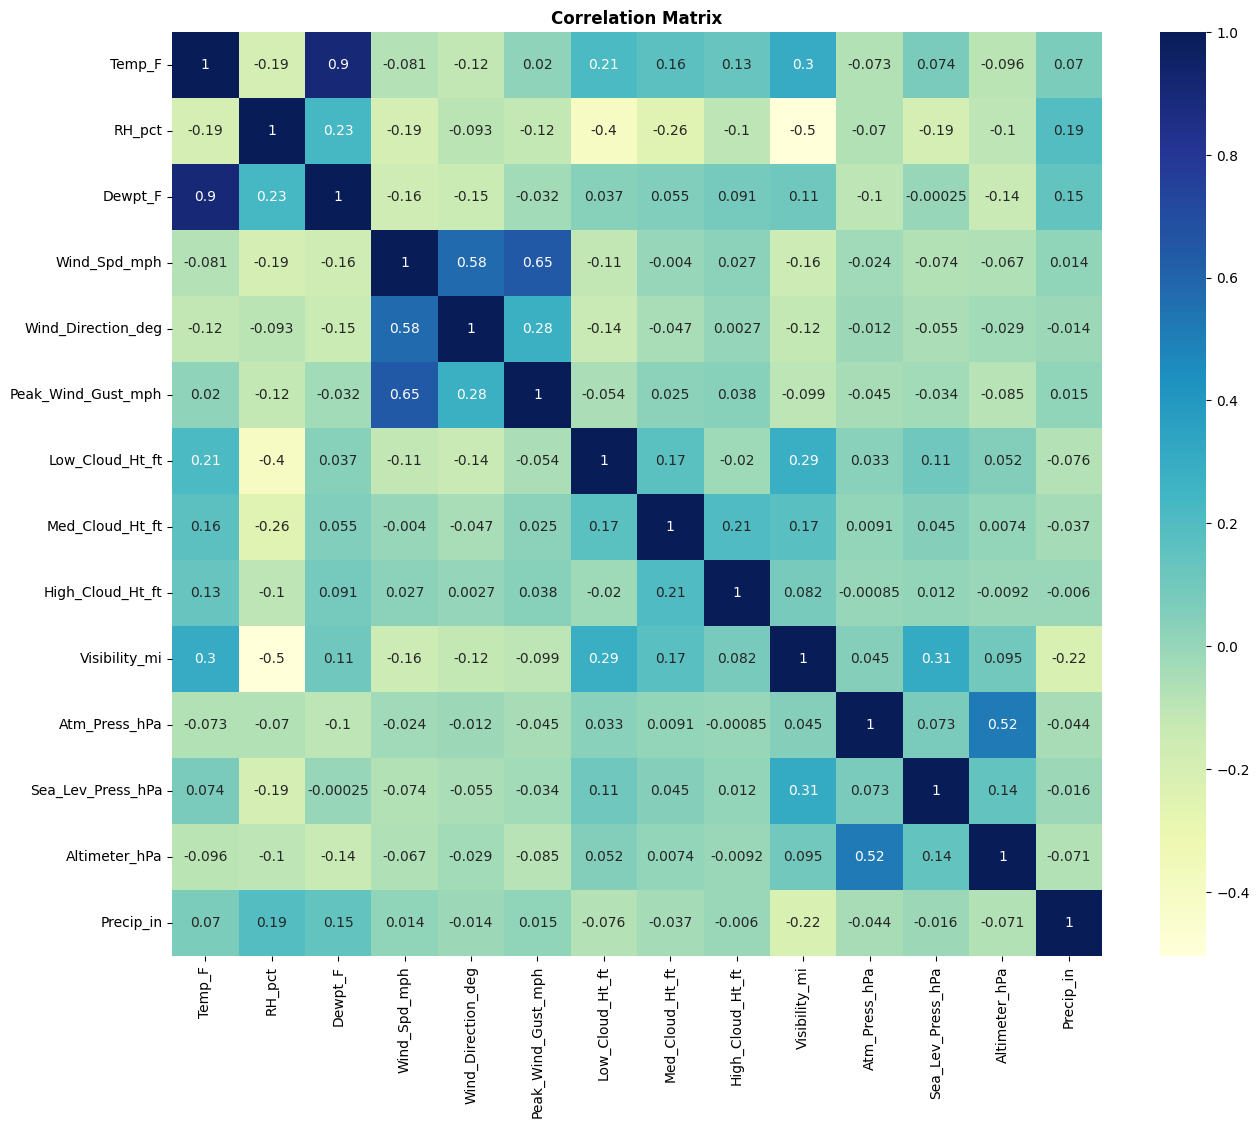

In [93]:
# Correlation 
correlation_matrix = filtered_les.corr(method = 'pearson')
plt.subplots(figsize=(15,12))

# Heatmap
sns.heatmap(correlation_matrix, annot = True, cmap = "YlGnBu")
plt.title("Correlation Matrix", size = 12, weight = 'bold')

In [94]:
filtered_les = filtered_les.drop(['Dewpt_F', 'Peak_Wind_Gust_mph'], axis=1)
filtered_les = filtered_les.reset_index(drop=True)

# Information about dataset shape
print('Total observations: ', filtered_les.shape[0])
print('Total number of features: ', filtered_les.shape[1])
filtered_les.head()

Total observations:  14951
Total number of features:  12


,Temp_F,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
0,60.0,49.0,10,270,3600,0,0,10,994.7,1017.8,1017.6,0.0
1,60.0,47.0,3,0,0,0,0,10,994.7,1017.7,1017.6,0.0
2,59.0,55.0,6,40,0,0,0,10,994.7,1017.8,1017.6,0.0
3,55.0,71.0,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0
4,50.0,82.0,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0


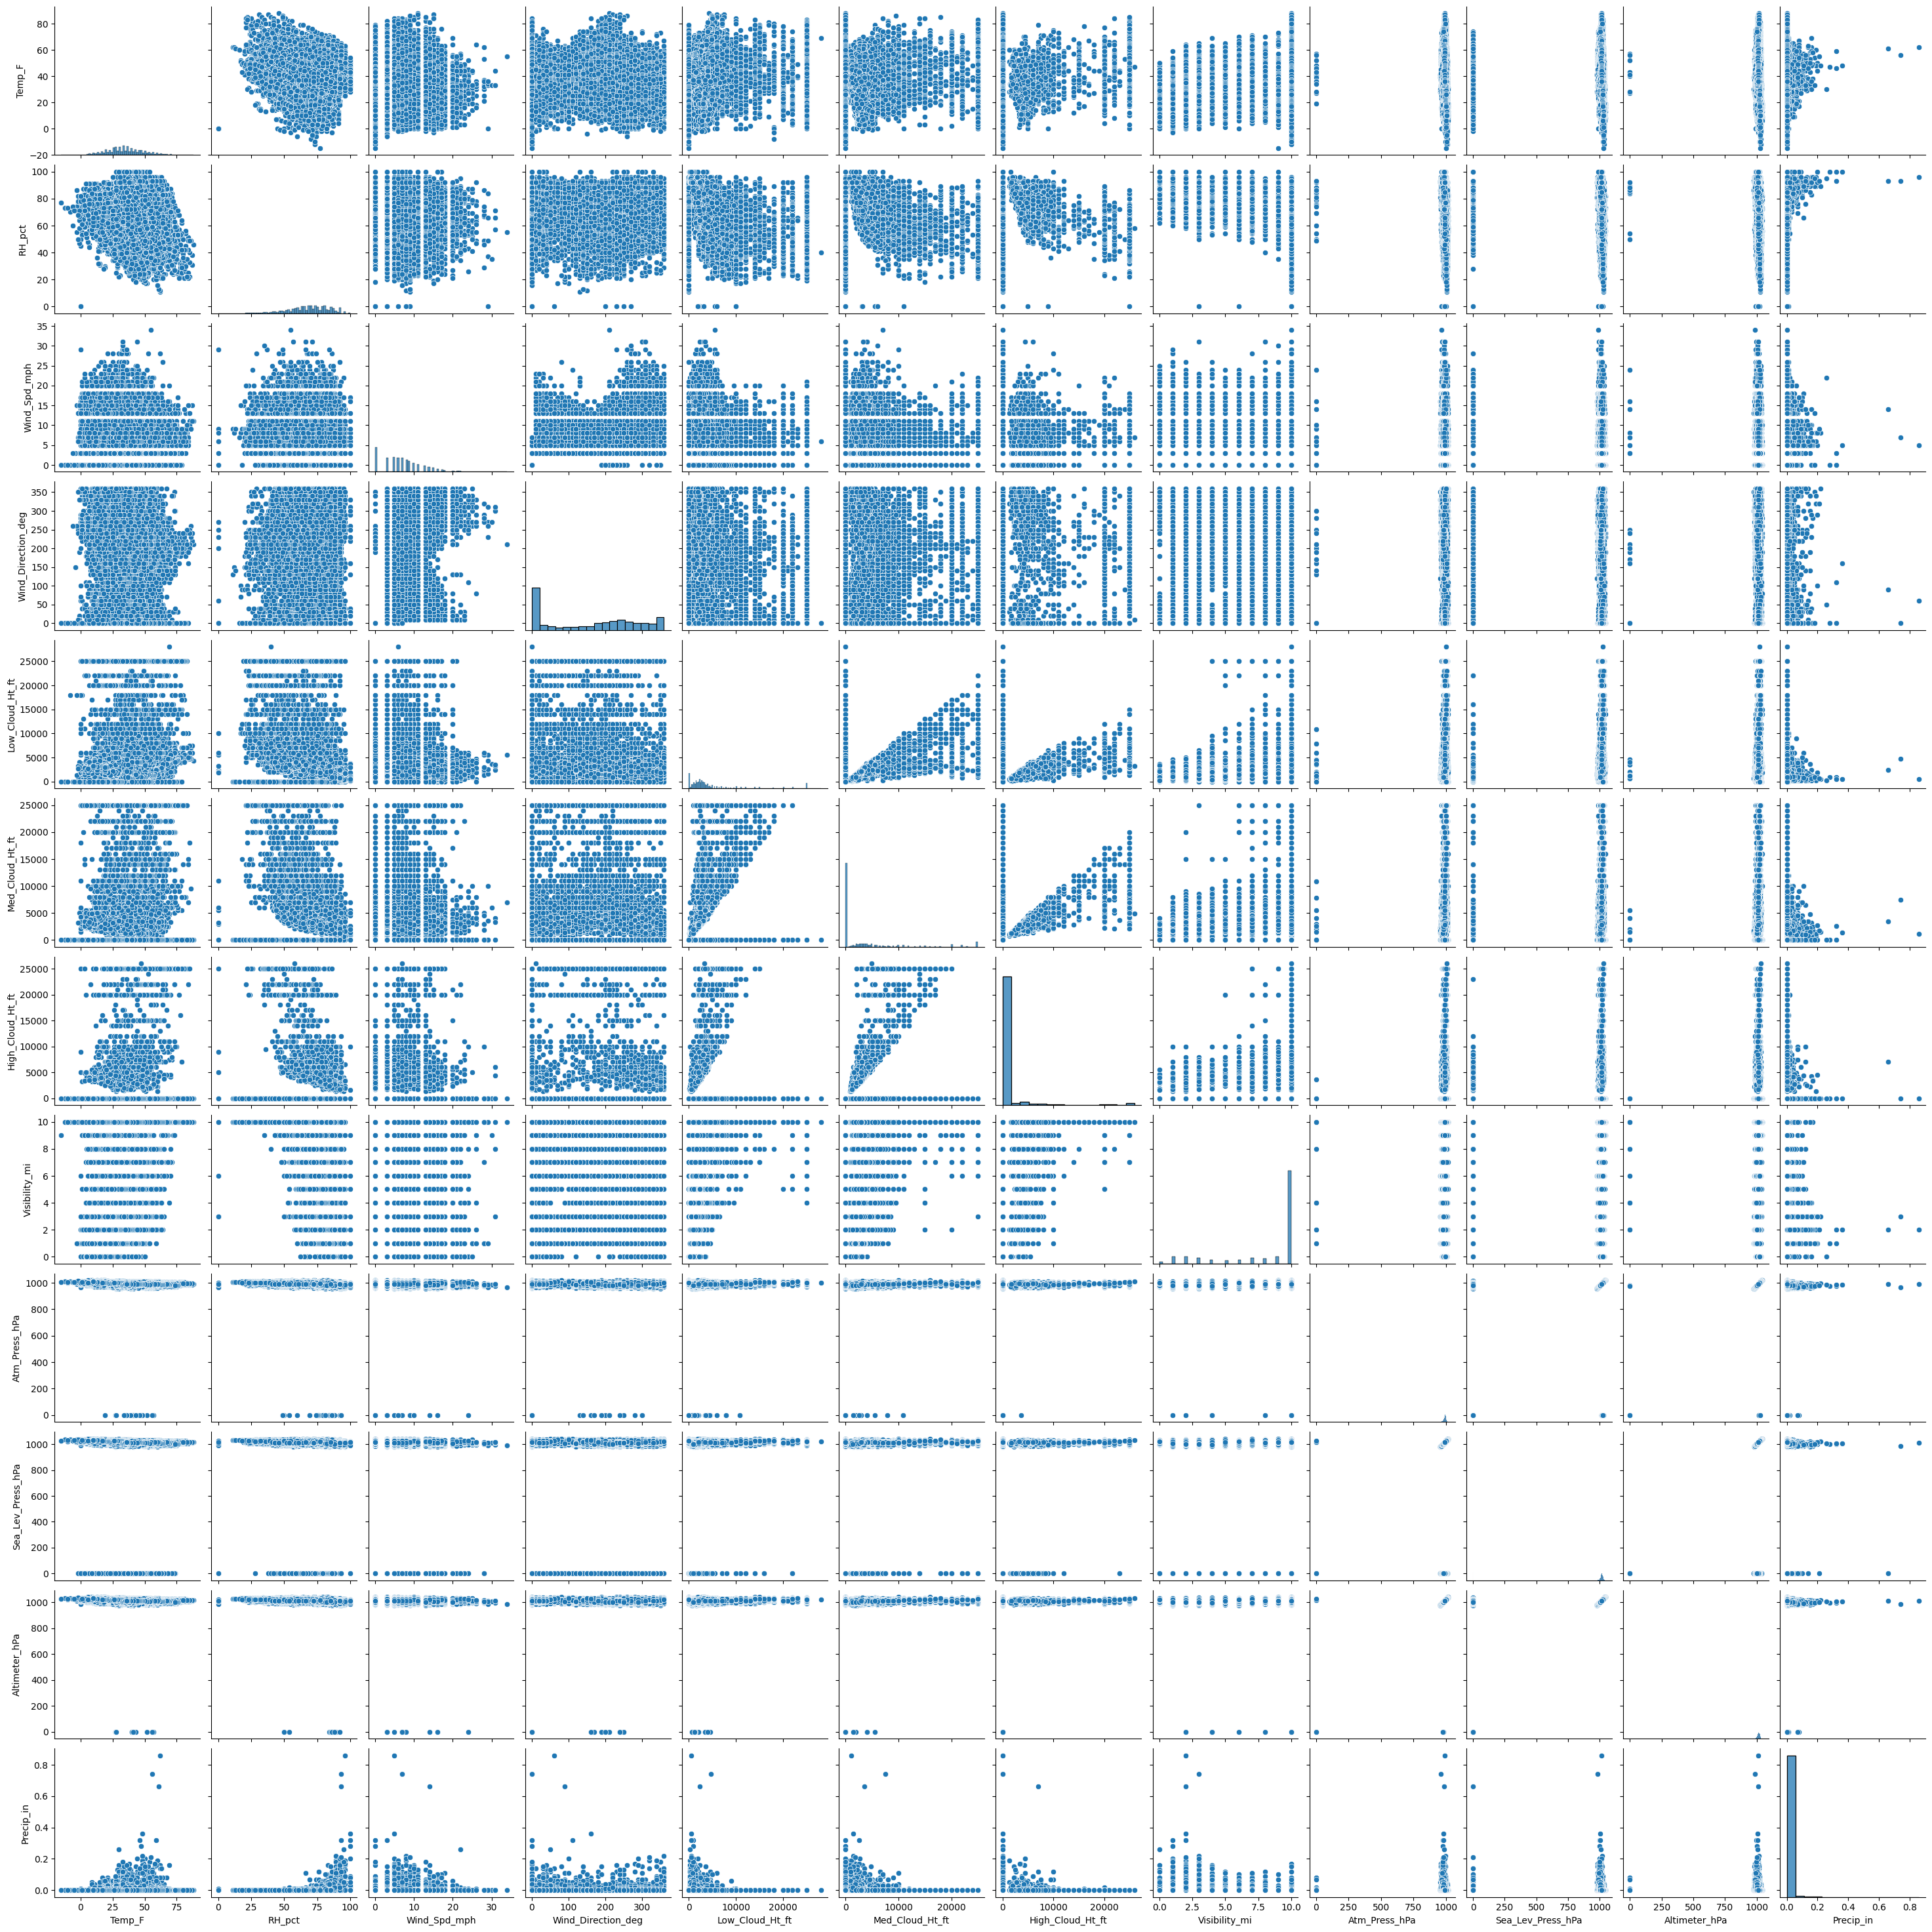

In [95]:
sns.pairplot(filtered_les)

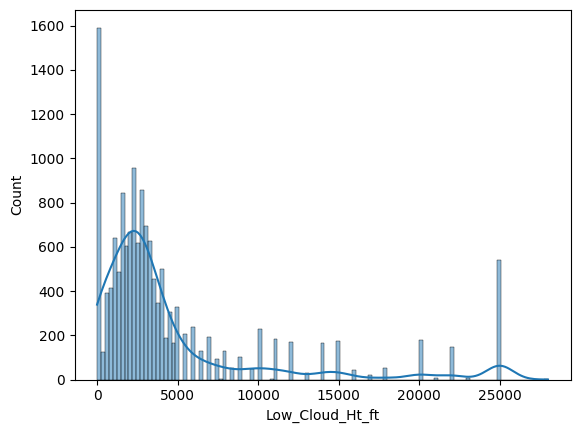

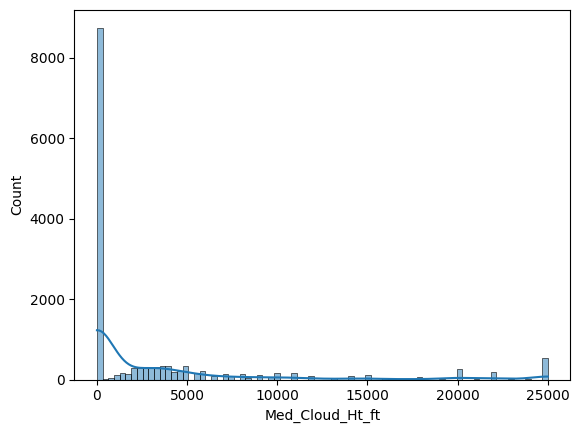

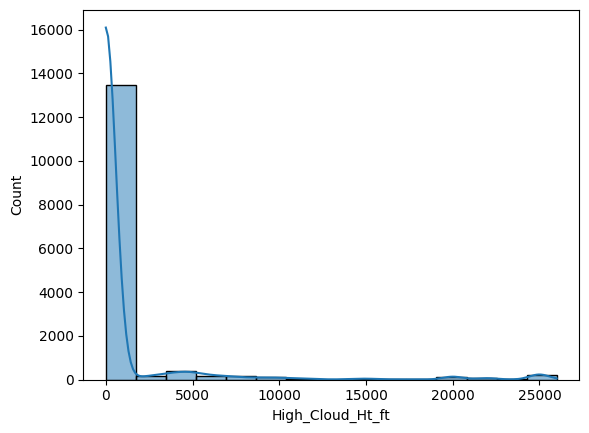

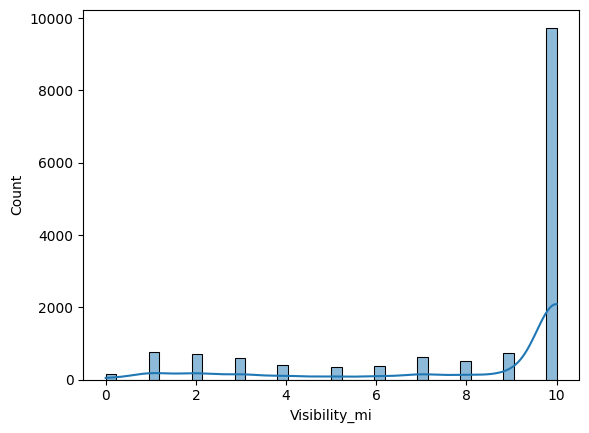

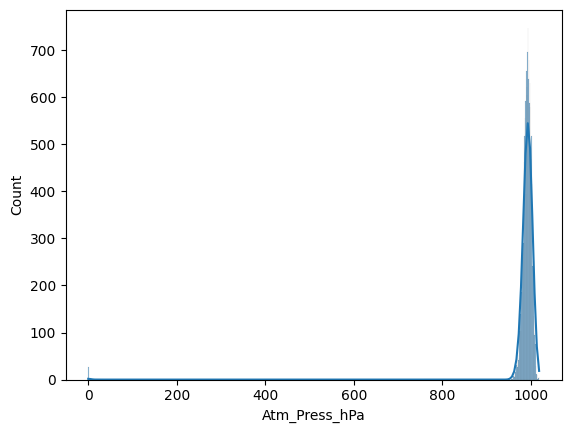

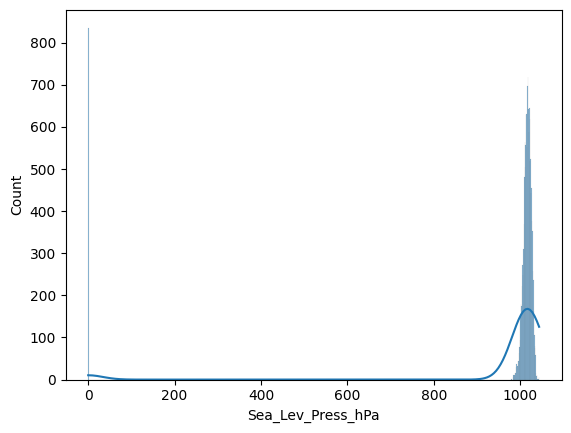

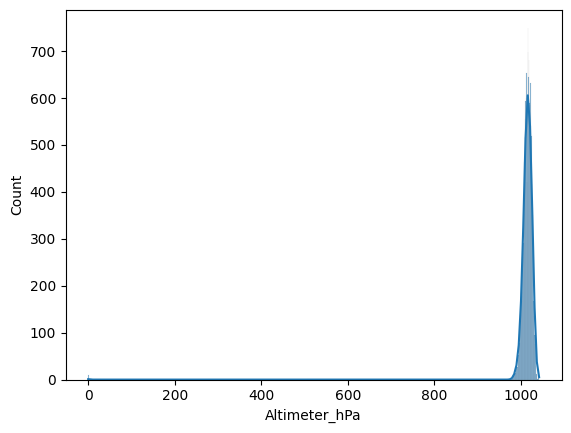

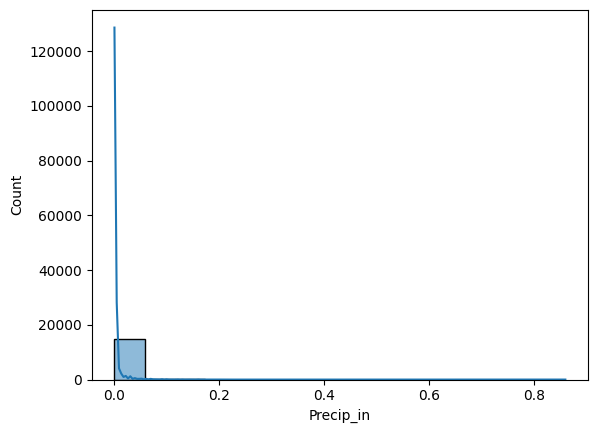

In [96]:
def distPlot(data):
    cols = data.columns[4:]
    for col in cols:
        sns.histplot(data[col], kde=True)
        plt.show()
        
distPlot(filtered_les)

In [97]:
filtered_les.columns.tolist()

['Temp_F',
 'RH_pct',
 'Wind_Spd_mph',
 'Wind_Direction_deg',
 'Low_Cloud_Ht_ft',
 'Med_Cloud_Ht_ft',
 'High_Cloud_Ht_ft',
 'Visibility_mi',
 'Atm_Press_hPa',
 'Sea_Lev_Press_hPa',
 'Altimeter_hPa',
 'Precip_in']

In [98]:
filtered_les["Precip_in"].value_counts()

Precip_in
0.00    13890
0.01      480
0.02      178
0.03      132
0.04       64
0.05       47
0.07       30
0.06       29
0.09       16
0.08       16
0.10       13
0.12        8
0.15        6
0.16        6
0.13        6
0.14        6
0.11        5
0.17        3
0.32        2
0.19        2
0.18        2
0.20        2
0.26        1
0.28        1
0.36        1
0.86        1
0.66        1
0.74        1
0.22        1
0.21        1
Name: count, dtype: int64

<Axes: xlabel='Precip_in', ylabel='Count'>

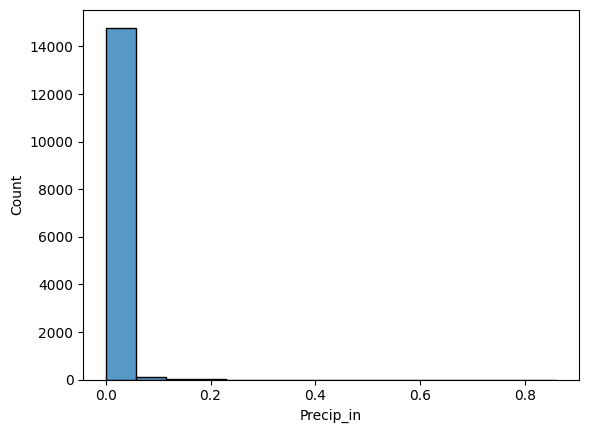

In [99]:
sns.histplot(filtered_les["Precip_in"])

In [100]:
filtered_les["Precip_in"][filtered_les["Precip_in"] > 0]

75       0.01
76       0.01
77       0.03
78       0.02
80       0.03
         ... 
14927    0.04
14928    0.01
14930    0.01
14931    0.01
14932    0.02
Name: Precip_in, Length: 1061, dtype: float64

<Axes: xlabel='Precip_in', ylabel='Count'>

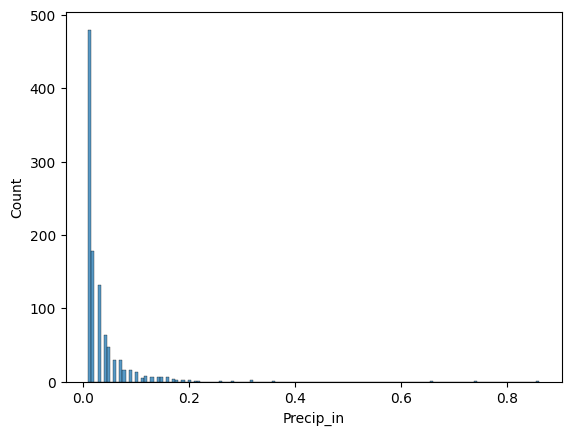

In [101]:
sns.histplot(filtered_les["Precip_in"][filtered_les["Precip_in"] > 0])

In [102]:
filtered_les.head()

,Temp_F,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
0,60.0,49.0,10,270,3600,0,0,10,994.7,1017.8,1017.6,0.0
1,60.0,47.0,3,0,0,0,0,10,994.7,1017.7,1017.6,0.0
2,59.0,55.0,6,40,0,0,0,10,994.7,1017.8,1017.6,0.0
3,55.0,71.0,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0
4,50.0,82.0,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0


In [103]:
filtered_les.loc[filtered_les['Precip_in'] > 0, 'LES_Precipitation'] = 1
filtered_les.loc[filtered_les['Precip_in'] <= 0, 'LES_Precipitation'] = 0
filtered_les

,Temp_F,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,LES_Precipitation
0,60.0,49.0,10,270,3600,0,0,10,994.7,1017.8,1017.6,0.0,0.0
1,60.0,47.0,3,0,0,0,0,10,994.7,1017.7,1017.6,0.0,0.0
2,59.0,55.0,6,40,0,0,0,10,994.7,1017.8,1017.6,0.0,0.0
3,55.0,71.0,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0,0.0
4,50.0,82.0,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14946,39.0,54.0,5,20,7000,10000,0,10,989.0,1012.6,1011.9,0.0,0.0
14947,37.0,61.0,3,330,5500,7000,0,10,989.3,1012.8,1012.2,0.0,0.0
14948,37.0,66.0,11,310,3500,5500,0,10,990.7,1014.1,1013.5,0.0,0.0
14949,36.0,85.0,0,0,2100,2900,5000,10,991.0,1014.6,1013.9,0.0,0.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4372\3209278870.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = filtered_les['LES_Precipitation'], palette=["#7fcdbb", "#edf8b1"])


<Axes: xlabel='LES_Precipitation', ylabel='count'>

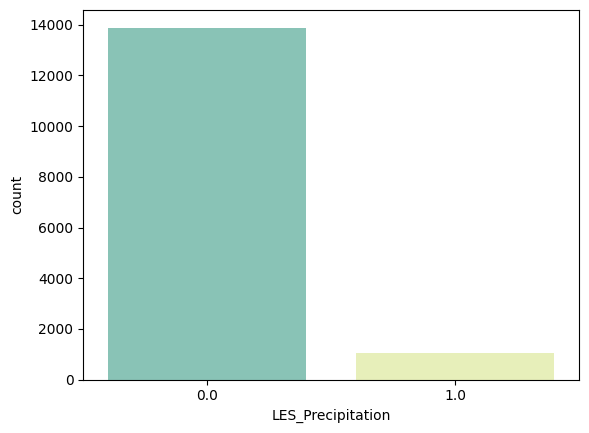

In [104]:
sns.countplot(x = filtered_les['LES_Precipitation'], palette=["#7fcdbb", "#edf8b1"])

In [105]:
folder_path = './Images/lake-michigan-images-64/none/'

# List all files in the folder
file_list = os.listdir(folder_path)
images = []
# Iterate over each file
for file_name in tqdm(file_list):
    file_path = os.path.join(folder_path, file_name)
    # im shape -> (64, 64)
    im = cv2.imread(file_path)
    # Storing 1 channel, since the images are grayscale, and cropping
    images.append(im[8:-8,8:-8,0]) 
    # images shape -> (35, 64, 64) 

100%|██████████████████████████████████████████████████████████████████████████| 13894/13894 [00:04<00:00, 3281.20it/s]


In [106]:
folder_path = './Images/lake-michigan-images-64/low/'

# List all files in the folder
file_list = os.listdir(folder_path)

# Iterate over each file
for file_name in tqdm(file_list):
    file_path = os.path.join(folder_path, file_name)
    # im shape -> (64, 64)
    im = cv2.imread(file_path)
    # Storing 1 channel, since the images are grayscale, and cropping
    images.append(im[8:-8,8:-8,0]) 
    # images shape -> (35, 64, 64) 

100%|██████████████████████████████████████████████████████████████████████████████| 854/854 [00:00<00:00, 3373.90it/s]


In [107]:
folder_path = './Images/lake-michigan-images-64/medium/'

# List all files in the folder
file_list = os.listdir(folder_path)

# Iterate over each file
for file_name in tqdm(file_list):
    file_path = os.path.join(folder_path, file_name)
    # im shape -> (64, 64)
    im = cv2.imread(file_path)
    # Storing 1 channel, since the images are grayscale, and cropping
    images.append(im[8:-8,8:-8,0]) 
    # images shape -> (35, 64, 64) 

100%|██████████████████████████████████████████████████████████████████████████████| 201/201 [00:00<00:00, 3328.09it/s]


In [108]:
folder_path = './Images/lake-michigan-images-64/high/'

# List all files in the folder
file_list = os.listdir(folder_path)

# Iterate over each file
for file_name in tqdm(file_list):
    file_path = os.path.join(folder_path, file_name)
    # im shape -> (64, 64)
    im = cv2.imread(file_path)
    # Storing 1 channel, since the images are grayscale, and cropping
    images.append(im[8:-8,8:-8,0]) 
    # images shape -> (35, 64, 64) 

100%|████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<?, ?it/s]


In [109]:
len(images)

14955

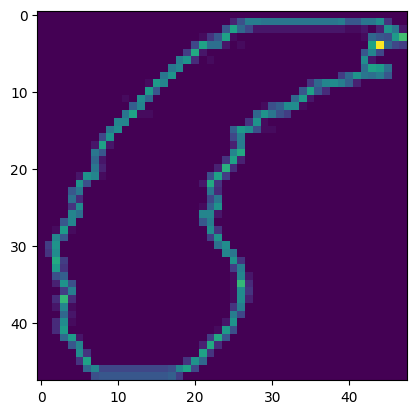

In [110]:
plt.imshow(images[146]) 

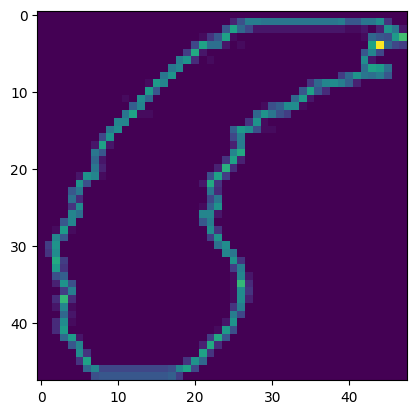

In [111]:
plt.imshow(images[147])

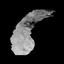

In [112]:
from PIL import Image, ImageOps
Image.open(r'./Images/lake-michigan-images-64/none/147.png')

Displaying next frames starting at image 10231.


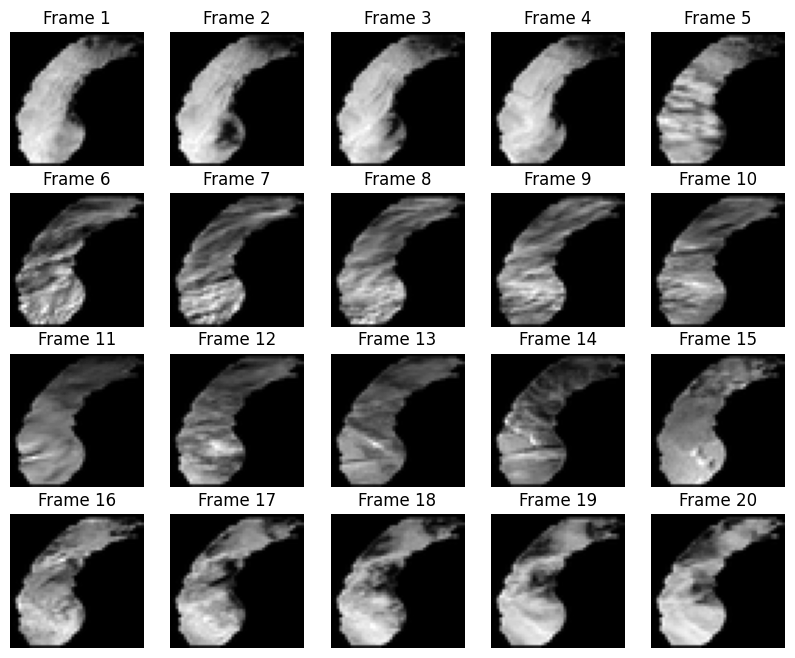

In [113]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(4, 5, figsize=(10, 8))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(images)), size=1)[0]
for idx, ax in enumerate(axes.flat):
    ax.imshow(images[data_choice + idx], cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying next frames starting at image {data_choice}.")
plt.show()

In [114]:
import shutil
import os

# List of source folders
source_folders = ['images/lake-michigan-images-64/high/', 'images/lake-michigan-images-64/medium/', 'images/lake-michigan-images-64/low/',
                 'images/lake-michigan-images-64/none/']

# Destination folder path
destination_folder = './Images/lake-michigan-images-64-combined/'

# Iterate through each source folder
for source_folder in source_folders:
    # Get a list of all image files in the current source folder
    image_files = [file for file in os.listdir(source_folder) if file.endswith('.png')]
    
    # Copy each image file from the current source folder to the destination folder
    for image_file in image_files:
        source_path = os.path.join(source_folder, image_file)
        destination_path = os.path.join(destination_folder, image_file)
        shutil.copyfile(source_path, destination_path)
